In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.data.utils import string_to_list as st
import scienceplots
plt.style.use(['science', 'ieee', 'grid', 'vibrant', 'no-latex'])


In [2]:
# Read and adjust data.
df = pd.read_csv('../data/all-data-clean-tokenized.csv')

# Create year, month and year-month features.
df['year'] = pd.to_datetime(df.fecha, format='%Y-%m-%d').dt.year
df['year-month'] = pd.to_datetime(df.fecha, format='%Y-%m-%d').dt.strftime('%Y-%m')

# Fix the problem with lists in pandas columns.
df['phrases'] = df['phrases'].apply(st)

# Filter out 2023.
#df = df.loc[df['year'] < 2023]


In [3]:
df.head(2)

,legislatura,fecha,objeto_iniciativa,numero_expediente,autores,nombre_sesion,orador,enlace_pdf,political_group,text,clean_text,phrases,year,year-month
0,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Anasagasti Olabeaga, Iñaki Mirena (GV-PNV)",https://www.congreso.es:443/public_oficiales/L...,PNV,"Gracias, señora presidenta. Esta investidura n...","['investidura', 'ver', 'cuatro', 'años', 'aque...","[investidura, ver, cuatro_años, aquella, oport...",2000,2000-04
1,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Frutos Gras, Francisco (GIU)",https://www.congreso.es:443/public_oficiales/L...,IU,"Señora presidenta, seño- ras y señores diputad...","['candidato', 'primer', 'lugar', 'lógico', 're...","[candidato, primer_lugar, lógico, reconocimien...",2000,2000-04


In [19]:
# Amount of recorded interventions per political group.

totals = df.groupby(['year-month','political_group']).count()['text']
totals['2001-06']

political_group
CIU      34
IU       38
PNV      15
PP      140
PSOE    136
Name: text, dtype: int64

In [118]:
terms = ['movimiento_feminista']
groups = ['VOX', 'PP', 'CS', 'UP', 'PSOE'] #, 'VOX', 'UP', 'CS']
corpus = df

for group in groups:
    mask = corpus.loc[corpus['political_group'] == group].phrases.apply(lambda x: any(term for term in terms if term in x))
    occurrence = corpus.loc[corpus['political_group'] == group][mask].groupby(['year']).count()['phrases']
    totals = corpus.loc[corpus['political_group'] == group].groupby(['year']).count()['phrases']
    print(f'Group:{group}, Occurrence: {occurrence/totals * 100}')

Group:VOX, Occurrence: year
2019         NaN
2020         NaN
2021    0.200669
2022    0.081433
2023         NaN
Name: phrases, dtype: float64
Group:PP, Occurrence: year
2000         NaN
2001         NaN
2002         NaN
2003         NaN
2004         NaN
2005         NaN
2006         NaN
2007         NaN
2008         NaN
2009         NaN
2010         NaN
2011         NaN
2012         NaN
2013         NaN
2014         NaN
2015         NaN
2016         NaN
2017         NaN
2018         NaN
2019         NaN
2020    0.102041
2021    0.188442
2022    0.596125
2023         NaN
Name: phrases, dtype: float64
Group:CS, Occurrence: year
2016         NaN
2017         NaN
2018         NaN
2019    0.452489
2020    0.133333
2021         NaN
2022         NaN
2023         NaN
Name: phrases, dtype: float64
Group:UP, Occurrence: year
2011         NaN
2012    0.226244
2013    0.142450
2014    0.203666
2015    0.461894
2016    0.186916
2017    0.089526
2018    1.251303
2019    0.769231
2020    1.785714
20

/var/folders/ct/921g5yd903j7f8wh5k85dltr0000gn/T/ipykernel_27460/2299724740.py:61: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


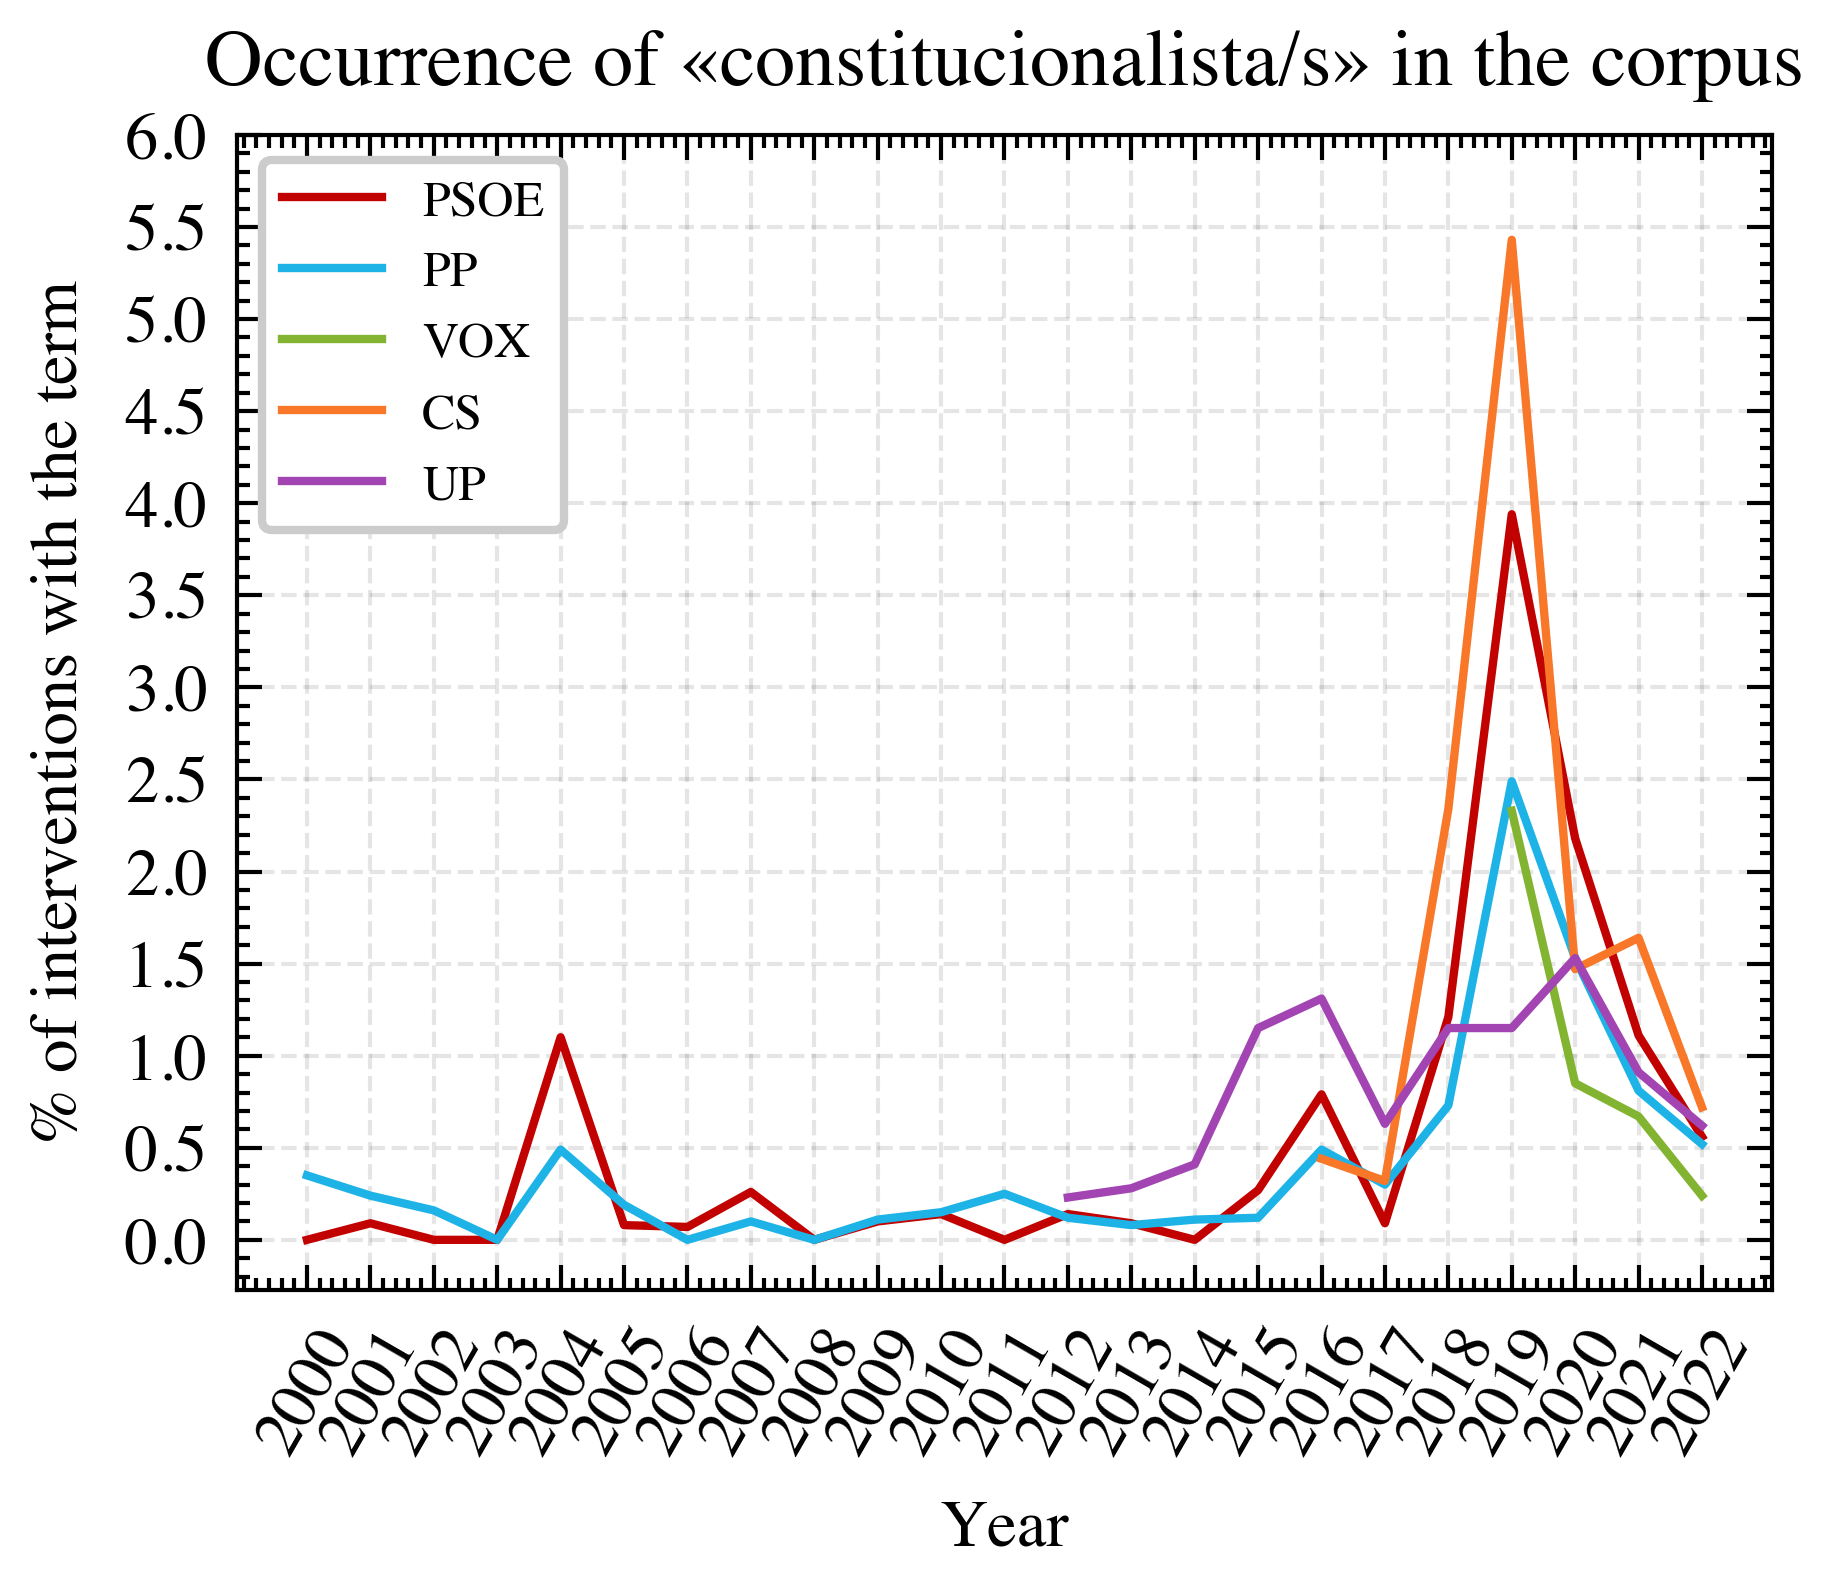

In [115]:
# Constitucionalista/s.

fig, ax = plt.subplots()
years = [2000, 2001, 2002, 2003, 2004,
         2005, 2006, 2007, 2008, 2009,
         2010, 2011, 2012, 2013, 2014,
         2015, 2016, 2017, 2018, 2019,
         2020, 2021, 2022]


VOX = [np.nan, np.nan, np.nan, np.nan, np.nan,
       np.nan, np.nan, np.nan, np.nan, np.nan,
       np.nan, np.nan, np.nan, np.nan, np.nan,
       np.nan, np.nan, np.nan, np.nan, 2.33,
       0.85, 0.67, 0.24]

PP = [0.35, 0.24, 0.16, 0.0, 0.49,
      0.19, 0.0, 0.1, 0.0, 0.11, 0.15,
      0.25, 0.12, 0.08, 0.11, 0.12,
      0.49, 0.30, 0.73, 2.49, 1.53,
      0.81, 0.52]

CS = [np.nan, np.nan, np.nan, np.nan, np.nan,
      np.nan, np.nan, np.nan, np.nan, np.nan,
      np.nan, np.nan, np.nan, np.nan, np.nan,
      np.nan, 0.44, 0.32, 2.34, 5.43,
      1.47, 1.64, 0.72]

UP = [np.nan, np.nan, np.nan, np.nan, np.nan,
      np.nan, np.nan, np.nan, np.nan, np.nan,
      np.nan, np.nan, 0.23, 0.28, 0.41,
      1.15, 1.31, 0.63, 1.15, 1.15, 1.53,
      0.91, 0.62]

PSOE = [0, 0.09, 0, 0, 1.1, 0.08,
        0.07, 0.26, 0, 0.1, 0.14,
        0, 0.14, 0.09, 0, 0.27,
        0.79, 0.09, 1.21, 3.94, 2.18,
        1.11, 0.56]



ax.plot(years, PSOE, label='PSOE', c='#c10200')
ax.plot(years, PP, label='PP', c='#1eb3e6')
ax.plot(years, VOX, label='VOX', c='#82b431')
ax.plot(years, CS, label='CS', c='#f87729')
ax.plot(years, UP, label='UP', c='#a245b2')

ax.set_xticks(years)
ax.set_yticks([0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])
ax.set_xticklabels(years, rotation=60)  # , ha='right')
ax.grid(alpha=.1)

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'% of interventions with the term')
ax.set_title(f'Occurrence of «constitucionalista/s» in the corpus')
ax.title.set_weight('bold')

ax.legend(fontsize=6)
fig.show()


In [ ]:
# Populista/s.

fig, ax = plt.subplots()

years = [2000, 2001, 2002, 2003, 2004, 
         2005, 2006, 2007, 2008, 2009, 
         2010, 2011, 2012, 2013, 2014, 
         2015, 2016, 2017, 2018, 2019, 
         2020, 2021, 2022]

PSOE = [0, 0.09, 0, 0.32, 0, 
        0.16, 0, 0.26, 0.53, 0.41, 
        1.35, 1.30, 1.54, 1.07, 0.79, 
        0.68, 0.99, 0.26, 1.87, 1.43, 
        2.62, 1.51, 2.95]

PP = [0.35, 0.16, 0.16, 0.16, 0.24, 
      0.19, 0.84, 0.67, 0.18, 0.44, 
      0.44, 0.00, 0.60, 1.44, 0.23, 
      2.88, 1.95, 1.72, 3.54, 3.56, 
      3.47, 2.39, 2.09]

UP = [np.nan, np.nan, np.nan, np.nan, np.nan,
      np.nan, np.nan, np.nan, np.nan, np.nan,
      np.nan, np.nan, 0.90, 1.14, 0.81,
      0.92, 0.56, 0.81, 1.04, 0.38,
      0.89, 0.53, 0.62]

VOX = [np.nan, np.nan, np.nan, np.nan, np.nan,
       np.nan, np.nan, np.nan, np.nan, np.nan,
       np.nan, np.nan, np.nan, np.nan, np.nan,
       np.nan, np.nan, np.nan, np.nan, 2.33,
       0.85, 0.74, 0.81]

CS =  [np.nan, np.nan, np.nan, np.nan, np.nan,
       np.nan, np.nan, np.nan, np.nan, np.nan,
       np.nan, np.nan, np.nan, np.nan, np.nan,
       np.nan, 1.53, 2.15, 4.41, 3.62,
       5.73, 3.58, 4.62]

ax.plot(years, PSOE, label='PSOE', c='#c10200')
ax.plot(years, UP, label='UP', c='#a245b2')
ax.plot(years, VOX, label='VOX', c='#82b431')
ax.plot(years, CS, label='CS', c='#f87729')
ax.plot(years, PP, label='PP', c='#1eb3e6')


ax.set_xticks(years)
ax.set_yticks([0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7])
ax.set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020,
               2022])
ax.set_xticklabels([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020,
                    2022], rotation=60)  # , ha='right')
ax.grid(alpha=.1)

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'N. of interventions with the term')
ax.set_title(f'Occurrence of «populista/s» in the corpus')
ax.title.set_weight('bold')

ax.legend(fontsize=6)
fig.show()


In [ ]:
# Socialcomunista/s.

fig, ax = plt.subplots()

years = [2017, 2018, 2019, 2020, 2021, 2022]
PSOE = [0, 0, 0, 1.42, 0.39, 0.32]
UP = [0, 0, 0, 1.28, 0.76, 0.35]
PP = [0, 0, 0, 3.06, 2.07, 0.89]
VOX = [0, 0, 0, 6.47, 4.48, 3.09]
CS = [0, 0, 0, 0, 0.20, 0.14]

ax.plot(years, PSOE, label='PSOE', c='#c10200')
ax.plot(years, PP, label='PP', c='#1eb3e6')
ax.plot(years, VOX, label='VOX', c='#82b431')
ax.plot(years, CS, label='CS', c='#f87729')
ax.plot(years, UP, label='UP', c='#a245b2')

ax.set_xticks(years)
ax.set_yticks([0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7])
ax.set_xticklabels(years, rotation=60)  # , ha='right')
ax.grid(alpha=.1)

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'% of interventions with the term')
ax.set_title(f'Occurrence of «socialcomunista/s» in the corpus')
ax.title.set_weight('bold')

ax.legend(fontsize=6)
fig.show()


In [ ]:
# Filoetarra/s.

fig, ax = plt.subplots()

years = [2017, 2018, 2019, 2020, 2021, 2022]
PP = [0, 0.18, 0.71, 0.31, 0, 0.15]
VOX = [0, 0, 0, 0.61, 0.33, 1.14]
CS = [0, 0, 0, 0.14, 0, 0]

ax.plot(years, PP, label='PP', c='#1eb3e6')
ax.plot(years, VOX, label='VOX', c='#82b431')
ax.plot(years, CS, label='CS', c='#f87729')
    

ax.set_xticks(years)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
ax.set_xticklabels(years, rotation=60)  # , ha='right')
ax.grid(alpha=.1)

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'% of interventions with the term')
ax.set_title(f'Occurrence of «filoetarra/s» in the corpus')
ax.title.set_weight('bold')

ax.legend(fontsize=6)
fig.show()


In [ ]:
# Bilduetarra/s

fig, ax = plt.subplots()

years = [2017, 2018, 2019, 2020, 2021, 2022]
PP = [0, 0, 0, 0.1, 0.25, 0.22]
VOX = [0, 0, 0, 0.24, 0.40, 0.90]
CS = [0, 0, 0, 0, 0.1, 0]

ax.plot(years, PP, label='PP', c='#1eb3e6')
ax.plot(years, VOX, label='VOX', c='#82b431')
ax.plot(years, CS, label='CS', c='#f87729')

ax.set_xticks(years)
ax.set_yticks([0, .2, .4, .6, .8, 1.0, 1.2])
ax.set_xticklabels(years, rotation=60)  # , ha='right')
ax.grid(alpha=.1)

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'% of interventions with the term')
ax.set_title(f'Occurrence of «bilduetarra/s» in the corpus')
ax.title.set_weight('bold')

ax.legend(fontsize=6, loc = 'upper left')
fig.show()


In [ ]:
# Bilduetarra/s & Filoetarra/s.

fig, ax = plt.subplots()

years = [2017, 2018, 2019, 2020, 2021, 2022]
PP = [0, 0.18, 0.71, 0.41, 0.25, 0.30]
VOX = [0, 0, 0, 0.85, 0.73, 2.04]
CS = [0, 0, 0, 0.8, 0.1, 0.14]

ax.plot(years, PP, label='PP', c='#1eb3e6')
ax.plot(years, VOX, label='VOX', c='#82b431')
ax.plot(years, CS, label='CS', c='#f87729')

ax.set_xticks(years)
ax.set_yticks([0, .2, .4, .6, .8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2])
ax.set_xticklabels(years, rotation=60)  # , ha='right')
ax.grid(alpha=.1)

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'% of interventions with the term')
ax.set_title(f'Occurrence of «bildu-/filo- etarra/s» in the corpus')
ax.title.set_weight('bold')

ax.legend(fontsize=6)
fig.show()


In [ ]:
# Emergencia/crisis climática.

fig, ax = plt.subplots()

years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
PSOE = [0, 0, 0, 0, 0, 0, 0, 1.43, 1.86, 0.92, 1.43]
UP = [0.68, 0, 0, 0.46, 0, 0, 0.1, 3.46, 2.30, 1.74, 1.67]
PP = [0, 0, 0, 0, 0, 0, 0, 0, 1.07, 0.31, 0.07]
VOX = [np.nan, np.nan, np.nan, np.nan, np.nan, 0, 0, 0, 0.61, 0.53, 0.90]
CS = [np.nan, np.nan, np.nan, 0, 0, 0, 0, 0.9, 0.4, 0.0, 0.14]

ax.plot(years, PSOE, label='PSOE', c='#c10200')
ax.plot(years, PP, label='PP', c='#1eb3e6')
ax.plot(years, VOX, label='VOX', c='#82b431')
ax.plot(years, CS, label='CS', c='#f87729')
ax.plot(years, UP, label='UP', c='#a245b2')

ax.set_xticks(years)
ax.set_yticks([0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5])
ax.set_xticklabels(years, rotation=60)  # , ha='right')
ax.grid(alpha=.1)

# Titles
ax.set_xlabel('Year')
ax.set_ylabel(f'% of interventions with the term')
ax.set_title(f'Occurrence of «crisis/emergencia climática» in the corpus')
ax.title.set_weight('bold')

ax.legend(fontsize=6)
fig.show()


In [112]:

text_file = open("test.txt", "w")
text_file.write(corpus.loc[54708].text)
text_file.close()
